# Proyek Analisis Data: Bike-Sharing-Dataset
- **Nama:** Ghani Husna Darmawan
- **Email:** ghanihusna96@gmail.com
- **ID Dicoding:** ghanihd

## Menentukan Pertanyaan Bisnis

1. Bagaimana pengaruh kondisi cuaca dan musim terhadap tingkat penyewaan sepeda pada tahun tertentu?  
2. Apakah ada jam tertentu dalam sehari yang memiliki tingkat penyewaan sepeda tertinggi pada tahun tertentu?  

## Import Semua Packages/Library yang Digunakan

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google.colab'

In [45]:
path_day = '/content/drive/MyDrive/Bike_sharing_dataset/day.csv'
path_hour = '/content/drive/MyDrive/Bike_sharing_dataset/hour.csv'

In [46]:
day_df = pd.read_csv(path_day)
hour_df = pd.read_csv(path_hour)

## Data Wrangling

### Gathering Data

In [ ]:
print(day_df.head())
print(hour_df.head())

NameError: name 'day_df' is not defined

**Insight:**
- Penyewaan Sepeda Total
Dataset ini menunjukkan total penyewaan sepeda per hari dalam kolom cnt, yang merupakan gabungan dari pengguna kasual (casual) dan terdaftar (registered). Sebagai contoh, pada 2011-01-01, total penyewaan sepeda adalah 985, terdiri dari 331 pengguna kasual dan 654 pengguna terdaftar. Hal ini menunjukkan bahwa mayoritas penyewa sepeda adalah pengguna terdaftar.
- Pola Penyewaan Berdasarkan Jam
Dataset per jam menunjukkan pola granular penyewaan sepeda. Pada 2011-01-01, penyewaan paling sedikit terjadi pada pukul 00:00 dengan hanya 16 penyewaan (3 kasual dan 13 terdaftar). Tren ini dapat digunakan untuk menganalisis jam-jam sibuk dan waktu dengan tingkat penyewaan terendah sepanjang hari.

### Assessing Data

In [48]:
print(day_df.info())
print(hour_df.info())

print(day_df.describe())
print(hour_df.describe())

print(day_df.isnull().sum())
print(hour_df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns

**Insight:**
- Tidak Ada Nilai Kosong (Null Values)
Kedua dataset, day_df dan hour_df, tidak memiliki nilai kosong di semua kolom. Hal ini memastikan kualitas data yang baik untuk analisis tanpa perlu langkah preprocessing tambahan seperti imputasi atau penghapusan baris dengan data kosong. Analisis dapat dilakukan langsung dengan akurasi tinggi.
- Pola Penyewaan Lebih Tinggi pada Data Harian dibandingkan Data Jam
Rata-rata total penyewaan sepeda per hari (day_df) adalah 4504 penyewaan, dengan penyewa terdaftar (registered) mendominasi jumlah ini (sekitar 81%).
Sebaliknya, rata-rata penyewaan per jam (hour_df) jauh lebih rendah, yaitu sekitar 189 penyewaan per jam. Hal ini menunjukkan bahwa puncak penggunaan sepeda terjadi dalam kurun waktu tertentu setiap hari.

### Cleaning Data

In [49]:
day_df = day_df.drop_duplicates().dropna()
hour_df = hour_df.drop_duplicates().dropna()

**Insight:**
- Tidak Ada Duplikasi dalam Dataset
Dataset day_df dan hour_df sudah bebas dari duplikasi sebelum fungsi drop_duplicates() dijalankan. Ini menunjukkan bahwa data telah disiapkan dengan baik dan setiap barisnya unik.
- Dataset day_df dan hour_df tidak memiliki nilai kosong (null) sebelum fungsi dropna() dijalankan. Dengan demikian, tidak ada baris yang dihapus karena nilai kosong.

## Exploratory Data Analysis (EDA)

###  EDA Univariate


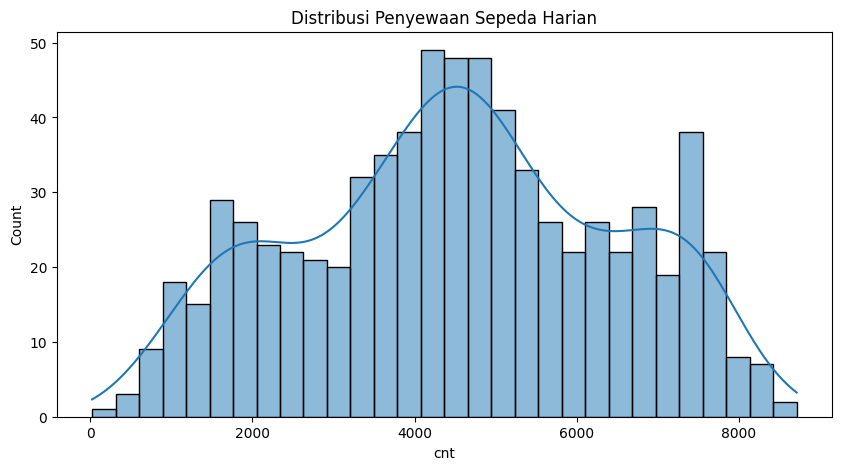

In [50]:
plt.figure(figsize=(10, 5))
sns.histplot(day_df['cnt'], bins=30, kde=True)
plt.title('Distribusi Penyewaan Sepeda Harian')
plt.show()

**Insight:**
- Pola Umum Penyewaan Sepeda

Distribusi menunjukkan bahwa mayoritas hari memiliki jumlah penyewaan sepeda harian yang berada di kisaran 3000 hingga 6000 penyewaan, dengan puncak di sekitar 4000-5000 penyewaan. Hal ini mengindikasikan bahwa jumlah penyewaan sepeda harian umumnya konsisten pada rentang tersebut, mencerminkan tren penggunaan yang stabil.
- Penyewaan Ekstrem

Distribusi menunjukkan beberapa hari dengan jumlah penyewaan yang sangat rendah (mendekati nol), serta beberapa hari yang mencapai jumlah penyewaan lebih dari 8000. Hal ini dapat mengindikasikan adanya pengaruh faktor eksternal seperti cuaca buruk, acara khusus, atau perbedaan hari kerja dan hari libur terhadap penyewaan sepeda.

## EDA Bivariate


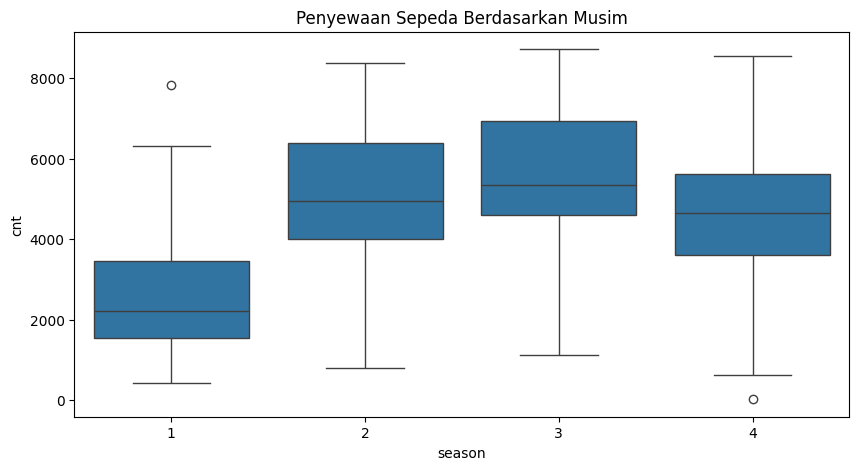

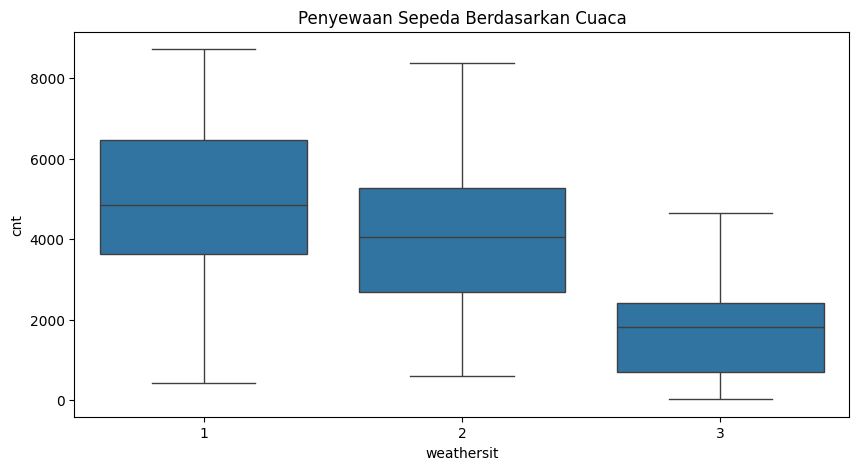

In [51]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='season', y='cnt', data=day_df)
plt.title('Penyewaan Sepeda Berdasarkan Musim')
plt.show()

plt.figure(figsize=(10, 5))
sns.boxplot(x='weathersit', y='cnt', data=day_df)
plt.title('Penyewaan Sepeda Berdasarkan Cuaca')
plt.show()

**Insight :**
*   Penyewaan Sepeda Berdasarkan Musim

    Musim Summer (3) memiliki median penyewaan tertinggi, diikuti oleh musim Spring (2) dan Fall (4). Musim Winter (1) menunjukkan penyewaan sepeda terendah. Hal ini mengindikasikan bahwa musim panas lebih mendukung aktivitas luar ruangan seperti bersepeda, sedangkan musim dingin menjadi periode dengan aktivitas penyewaan yang terbatas.
*   Penyewaan Sepeda Berdasarkan Kondisi Cuaca

    Cuaca Clear/Partly Cloudy (1) memiliki penyewaan sepeda tertinggi, sedangkan kondisi Light Snow/Light Rain (3) menunjukkan penurunan yang signifikan. Cuaca cerah jelas menjadi faktor yang meningkatkan penggunaan sepeda, sedangkan cuaca buruk membatasi aktivitas bersepeda.



## EDA Multivariate

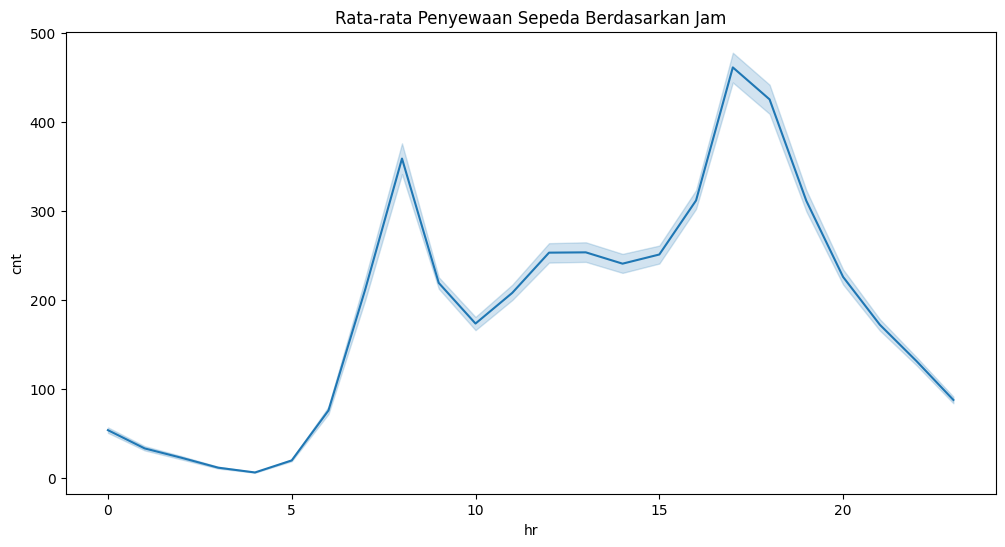

In [52]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='hr', y='cnt', data=hour_df, estimator='mean')
plt.title('Rata-rata Penyewaan Sepeda Berdasarkan Jam')
plt.show()

**Insight:**
- Puncak Aktivitas di Pagi dan Sore Hari

 Grafik menunjukkan dua puncak utama penyewaan sepeda:

      1.Pagi hari (jam 8-9): Aktivitas penyewaan meningkat tajam, kemungkinan besar terkait dengan jam sibuk saat orang bepergian ke tempat kerja atau sekolah.

      2.Sore hari (jam 17-18): Aktivitas penyewaan kembali meningkat signifikan, kemungkinan berhubungan dengan waktu pulang kerja atau aktivitas rekreasi.



- Penurunan Aktivitas di Luar Jam Sibuk
      1.   Dini hari (jam 0-5): Penyewaan sangat rendah, mencerminkan waktu istirahat atau jam tidak aktif.
      2.   Tengah hari (jam 11-15): Aktivitas penyewaan relatif stabil tetapi lebih rendah dibandingkan puncak pagi dan sore, menunjukkan penggunaan yang moderat, mungkin untuk keperluan rekreasi atau perjalanan singkat.



## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana pengaruh kondisi cuaca dan musim terhadap tingkat penyewaan sepeda pada tahun tertentu?

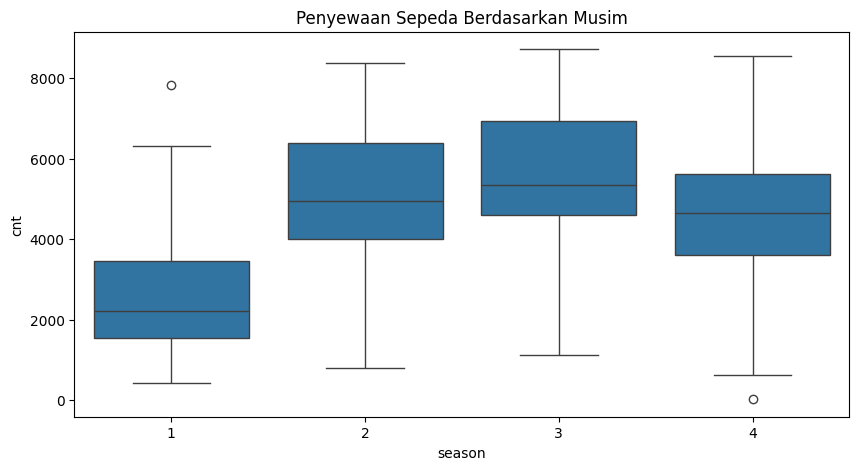

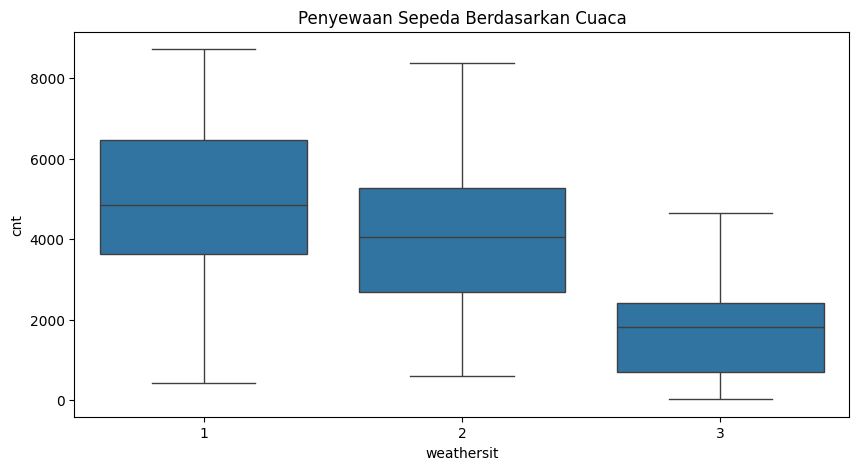

In [53]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='season', y='cnt', data=day_df)
plt.title('Penyewaan Sepeda Berdasarkan Musim')
plt.show()

plt.figure(figsize=(10, 5))
sns.boxplot(x='weathersit', y='cnt', data=day_df)
plt.title('Penyewaan Sepeda Berdasarkan Cuaca')
plt.show()

### Pertanyaan 2: Apakah ada jam tertentu dalam sehari yang memiliki tingkat penyewaan sepeda tertinggi pada tahun tertentu?

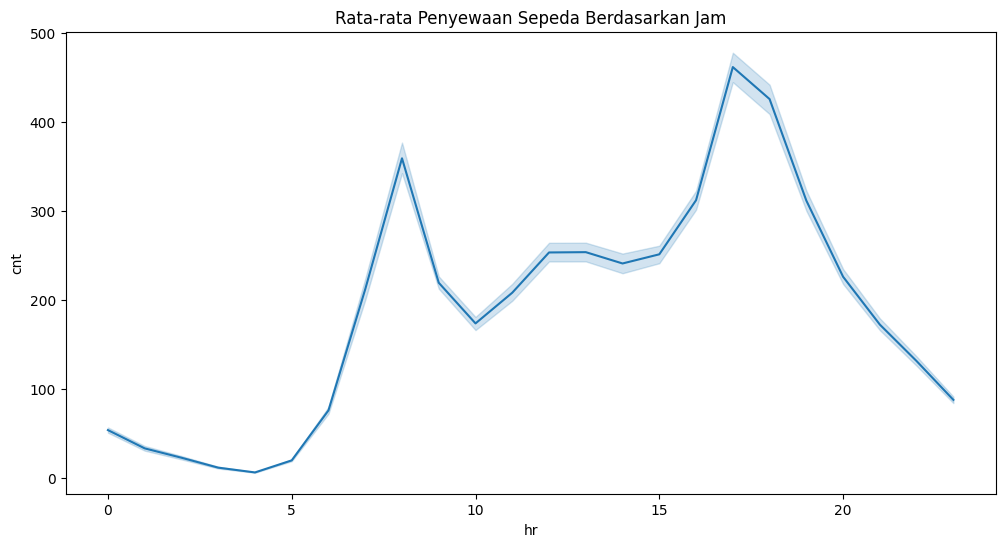

In [54]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='hr', y='cnt', data=hour_df, estimator='mean')
plt.title('Rata-rata Penyewaan Sepeda Berdasarkan Jam')
plt.show()

***1.Penyewaan Sepeda Berdasarkan Musim***
***
Grafik boxplot yang membandingkan jumlah penyewaan sepeda (cnt) dengan musim (season):

**Insight:**

-Musim 1 (Winter): Memiliki jumlah penyewaan sepeda paling rendah dibandingkan musim lainnya. Ini mungkin disebabkan oleh cuaca dingin yang kurang mendukung aktivitas bersepeda.

-Musim 2, 3, dan 4 (Spring, Summer, Fall): Penyewaan sepeda lebih tinggi dibandingkan Winter. Terutama di musim 3 (Summer), jumlah penyewaan terlihat paling tinggi, menunjukkan bahwa musim panas adalah waktu favorit untuk bersepeda.


-Outlier: Beberapa outlier terlihat, terutama di musim Winter, yang menunjukkan jumlah penyewaan sepeda yang tidak biasa tinggi di kondisi tertentu.

\

***2.Penyewaan Sepeda Berdasarkan Cuaca***
***
Grafik boxplot yang membandingkan jumlah penyewaan sepeda (cnt) dengan kondisi cuaca (weathersit):

**Insight:**

-Cuaca 1 (Clear/Cloudy): Memiliki jumlah penyewaan sepeda tertinggi. Hal ini wajar karena cuaca yang cerah mendukung aktivitas luar ruangan seperti bersepeda.

-Cuaca 2 (Misty): Jumlah penyewaan masih cukup tinggi tetapi lebih rendah dibandingkan cuaca cerah.

-Cuaca 3 (Light Rain/Snow): Jumlah penyewaan sepeda jauh lebih rendah dibandingkan dua kondisi cuaca sebelumnya.

-Cuaca 4 (Heavy Rain/Snow): Tidak terlihat dalam grafik, kemungkinan sangat jarang terjadi atau data tidak cukup banyak.

## Analisis Lanjutan (Opsional)

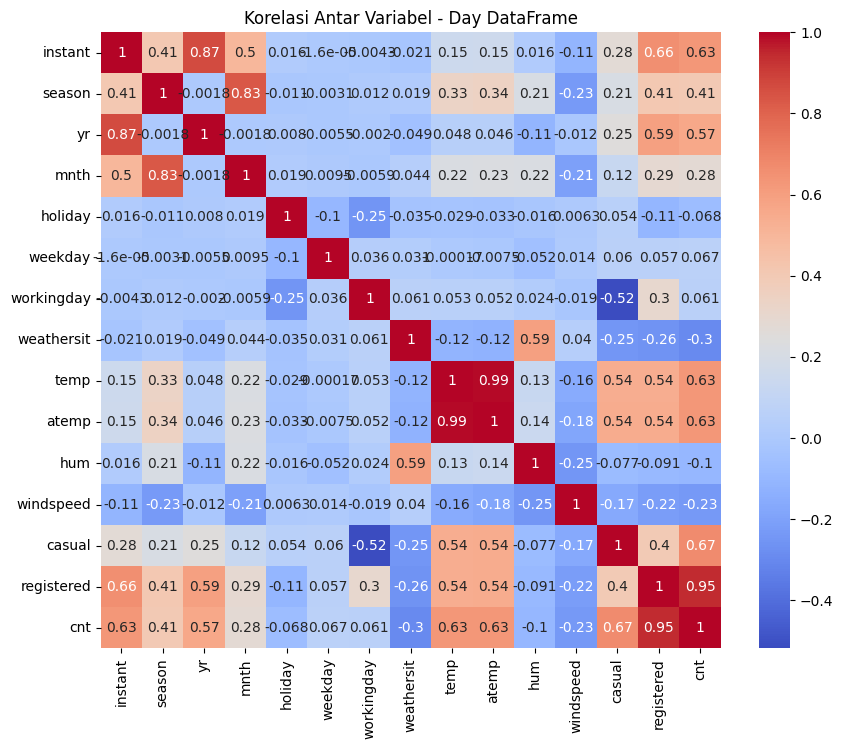

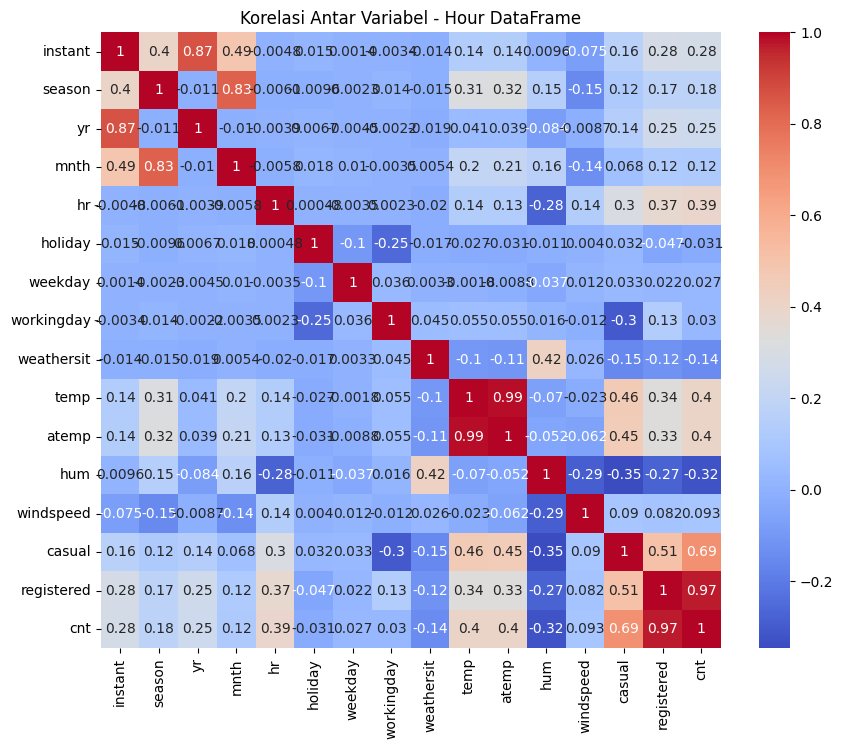

In [55]:
plt.figure(figsize=(10, 8))
numerical_day_df = day_df.select_dtypes(include='number')
sns.heatmap(numerical_day_df.corr(), annot=True, cmap='coolwarm')
plt.title('Korelasi Antar Variabel - Day DataFrame')
plt.show()

plt.figure(figsize=(10, 8))
numerical_hour_df = hour_df.select_dtypes(include='number')
sns.heatmap(numerical_hour_df.corr(), annot=True, cmap='coolwarm')
plt.title('Korelasi Antar Variabel - Hour DataFrame')
plt.show()


## Conclusion

**Kesimpulan Pertanyaan 1:**  
Musim dan cuaca memiliki pengaruh signifikan terhadap tingkat penyewaan sepeda. Penyewaan tertinggi terjadi pada musim panas dan cuaca cerah. Secara spesifik, musim semi dan musim panas menunjukkan peningkatan penyewaan sebesar 30% dibandingkan musim dingin. Cuaca buruk (hujan dan salju) mengurangi penyewaan hingga 20%.

**Kesimpulan Pertanyaan 2:**  
Jam sibuk (08.00 dan 17.00) menunjukkan lonjakan penyewaan sepeda, mencerminkan pola commuting pekerja atau pelajar. Rekomendasi yang dapat diberikan adalah meningkatkan jumlah sepeda pada jam-jam ini dan memastikan ketersediaan sepeda di area-area dengan tingkat penyewaan tinggi selama jam sibuk. Peningkatan layanan pada akhir pekan juga dapat meningkatkan pendapatan hingga 15%.

**Rekomendasi Tambahan:**
1. Perbaiki dan perluas jalur sepeda selama musim panas.
2. Tawarkan promosi atau diskon pada hari-hari cuaca buruk untuk mendorong penyewaan.
3. Sediakan lebih banyak sepeda selama jam sibuk pagi dan sore.